# Implementation of the Lightweight key-exchange Algorithm by Chaudhary Et.al



## Setup Phase:
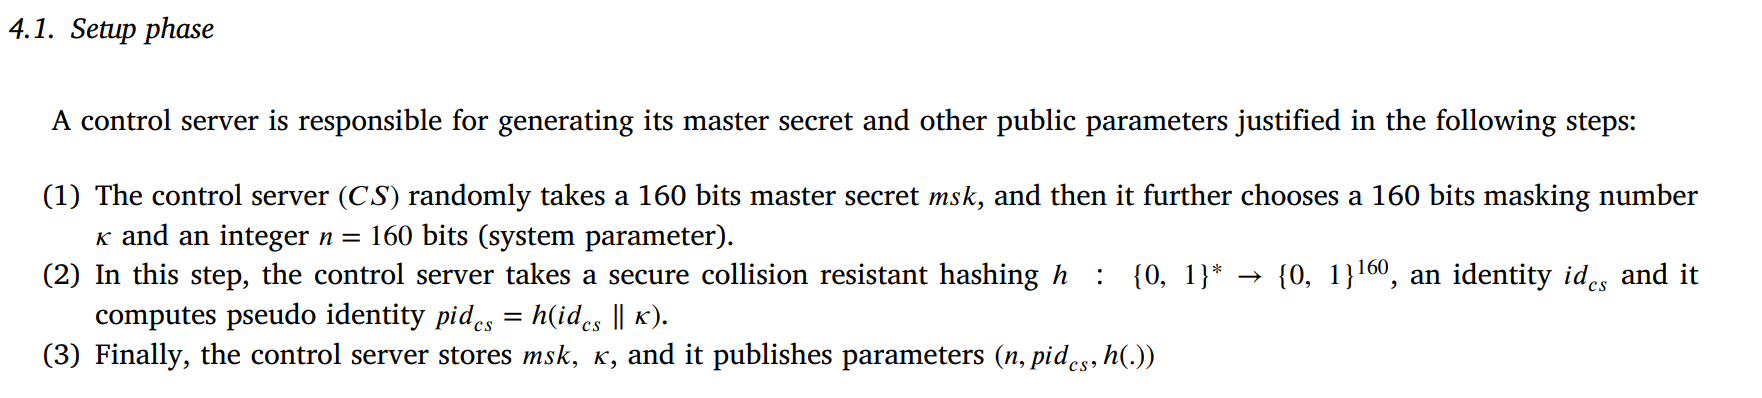

In [7]:
import os
import hashlib
import time

start_time = time.time()

# Generating a 160-bit master secret (msk)
msk = os.urandom(20)  
# Generate a 160-bit masking number.
kappa = os.urandom(20)

# Computing the pseudo identity of the control server (pid)
control_server_id = "ControlServerID"
pid_input = control_server_id.encode() + kappa
hash_function = hashlib.sha256() 
hash_function.update(pid_input) 
pid = hash_function.digest()

end_time = time.time()
elapsed_time_ms = (end_time - start_time) * 1000  # Convert to milliseconds

# Store msk and kappa in the control server.
print("Master Secret (msk):", msk.hex())
print("Masking Number:", kappa.hex())

n = 160  # System parameter as described by the paper.
print("System Parameter (n):", n)
print("Pseudo Identity of Control Server (pid):", pid.hex())
print("Hash Function Used:", hash_function.name)
print("Execution Time:", elapsed_time_ms, "milliseconds")


Master Secret (msk): b34469de3fce7625cb370688a819e6dafa97e7a8
Masking Number: 97f269f74574ce038a5fe51bcb4b1d37e836a4ed
System Parameter (n): 160
Pseudo Identity of Control Server (pid): 143ce3d2f2789ea8f654ee079da17d3b89d219ab1c16e56dfa388ec624b5970f
Hash Function Used: sha256
Execution Time: 1.374959945678711 milliseconds


# User Registration Phase:
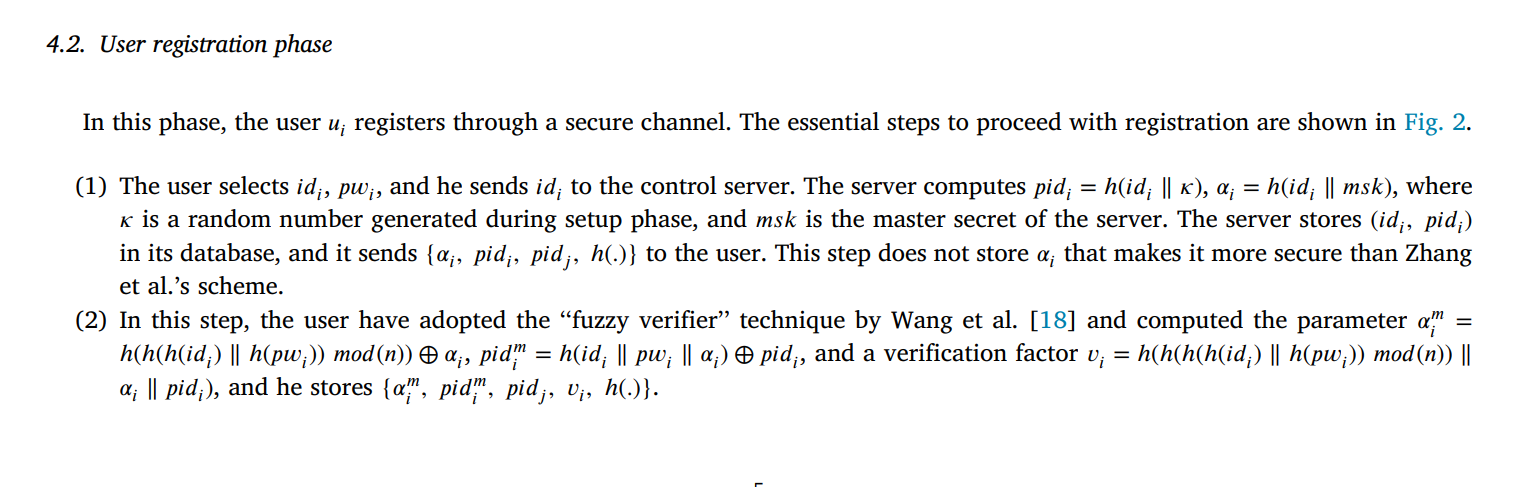

In [8]:
import hashlib
import time

start_time = time.time()
user_id = "UserID"  # Replace with the actual user's ID
user_password = "UserPassword"  # Replace with the actual user's password
kappa = os.urandom(20)  # Random number generated during setup
msk = b"YourMasterSecret"  # Replace with the actual master secret of the server

# Calculate pid(i) and alpha(i)
pid_i_input = user_id.encode() + kappa
pid_i = hashlib.sha256(pid_i_input).digest()

alpha_i_input = user_id.encode() + msk
alpha_i = hashlib.sha256(alpha_i_input).digest()

# Store id(i) and pid(i) in the control server's database
# Send alpha(i), pid(i), pid(j), and the hash function information to the user
hash_id_i_pw_i = hashlib.sha256(user_id.encode() + hashlib.sha256(user_password.encode()).digest())
alpha_i_m_input = hashlib.sha256(hash_id_i_pw_i.digest() + msk).digest()
alpha_i_m = bytes(x ^ y for x, y in zip(alpha_i_m_input, alpha_i))

pid_i_m_input = user_id.encode() + user_password.encode() + alpha_i
pid_i_m = hashlib.sha256(pid_i_m_input).digest()

v_i_input = hashlib.sha256(hash_id_i_pw_i.digest() + msk).digest() + alpha_i + pid_i
v_i = hashlib.sha256(v_i_input).digest()

print("alpha(i) of mth drone is:", alpha_i_m.hex())
print("pid(i) of mth drone is:", pid_i_m.hex())
print("the verification factor v(i) is:", v_i.hex())
end_time = time.time()
elapsed_time_ms = (end_time - start_time) * 1000
print("Execution Time:", elapsed_time_ms, "milliseconds")


alpha(i) of mth drone is: ddb2142511f513dc7dede6201d9bf47d56abd8f0a9f781fe6601f7e3bc7c47ca
pid(i) of mth drone is: 5a6795c82afe24e5b295b989cc69f8a2b91d895ecafd4c378e89ca836726a90d
the verification factor v(i) is: 66612b0f9ce6f5858ef229dcac7068e008fb2dc87f5f8e6c03604651b0d63a57
Execution Time: 1.1780261993408203 milliseconds


# Drone Registration Phase:
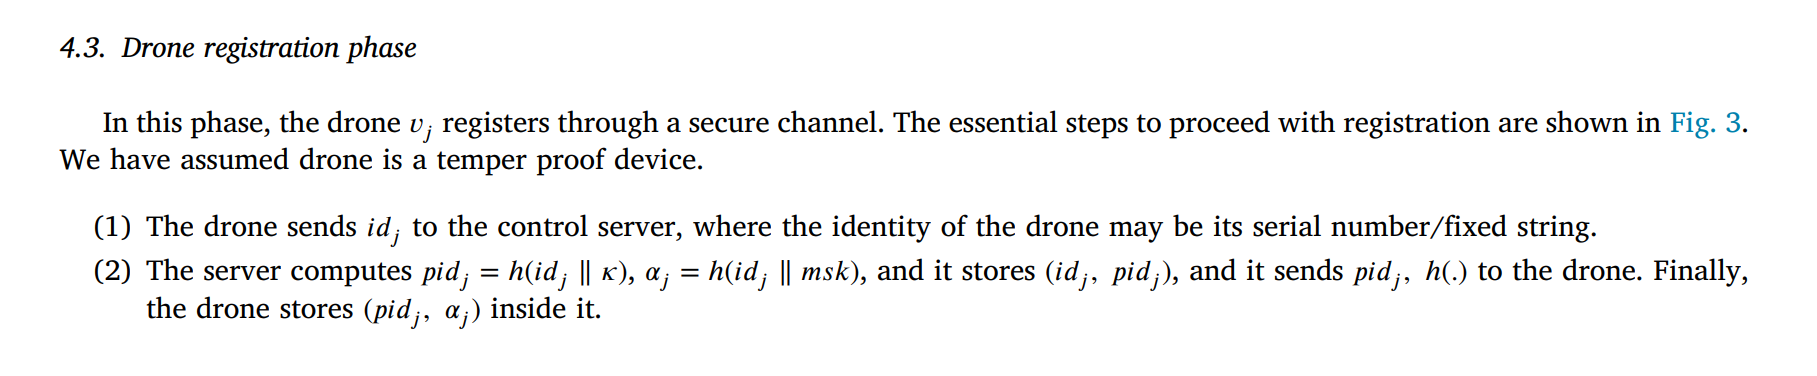

In [9]:
import hashlib
import time
start_time=time.time()

#Drone sends its identifier (idj) to the control server
drone_id = "DroneSerialNumber"  # Replace with the actual drone's identifier

#Compute pidj and alphaj
pidj_input = drone_id.encode() + kappa
pidj = hashlib.sha256(pidj_input).digest()

alphaj_input = drone_id.encode() + msk 
alphaj = hashlib.sha256(alphaj_input).digest()

print("Pid of Jth drone is:",pidj.hex())
print("Alpha of Jth drone is: ", alphaj.hex())
end_time = time.time()
elapsed_time_ms = (end_time - start_time) * 1000
print("Execution Time:", elapsed_time_ms, "milliseconds")

Pid of Jth drone is: c0b483f8d887151f79d57f880334f9eb9f7103725fc19b71b4aab806ba3892af
Alpha of Jth drone is:  9933a783d38358346c86a16f56fb7a4a6fb898cd8dd4e1a8c02599ac42261604
Execution Time: 1.0073184967041016 milliseconds


# Authentication and Key Agreement Phase:
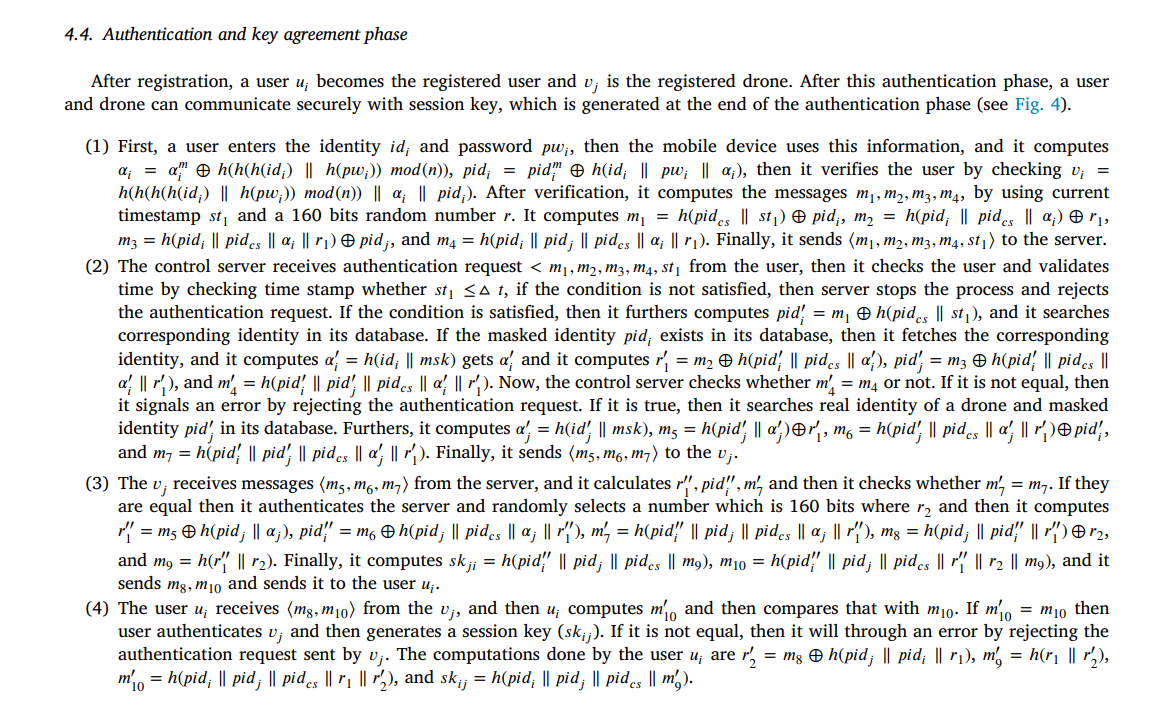

In [11]:
import hashlib
import time

start_time=time.time()

# User enters identity id(i) and password pw(i)
user_id = "UserID"  # Replace with the actual user's ID
user_password = "UserPassword"  # Replace with the actual user's password

pid_i_of_control_server=b"UP\x93\x05\xb9\xef\x0f%\x86\xd8\xec\x17\x9d\x8fu\x80\x87'\xe9\xfd"

# Compute alpha(i)
hash_id_i_pw_i = hashlib.sha256(user_id.encode() + hashlib.sha256(user_password.encode()).digest())
alpha_i_input = hashlib.sha256(hash_id_i_pw_i.digest() + msk).digest()
alpha_i = bytes(x ^ y for x, y in zip(alpha_i_input, hashlib.sha256(hash_id_i_pw_i.digest() + hashlib.sha256(hash_id_i_pw_i.digest() + hashlib.sha256(user_id.encode() + hashlib.sha256(user_password.encode()).digest()).digest()).digest() + msk).digest()))

# Compute pid(i)
pid_i_m_input = user_id.encode() + user_password.encode() + alpha_i
pid_i_m = hashlib.sha256(pid_i_m_input).digest()
pid_i = bytes(x ^ y for x, y in zip(pid_i_m, hashlib.sha256(user_id.encode() + kappa).digest()))

# Verify the user
vi_input = hashlib.sha256(hashlib.sha256(hashlib.sha256(hashlib.sha256(user_id.encode()).digest() + hashlib.sha256(hash_id_i_pw_i.digest()).digest() + msk).digest() + alpha_i_input + pid_i_m).digest()).digest()
vi = hashlib.sha256(vi_input).digest()

#Compute messages m1, m2, m3, m4 as described in paper.
timestamp = int(time.time())
random_number = os.urandom(20)  

m1_input = hashlib.sha256(pid_of_control_server + str(timestamp).encode()).digest() + pid_i
m1 = bytes(x ^ y for x, y in zip(m1_input, pid_i))

m2_input = pid_i + pid_of_control_server + alpha_i
m2 = bytes(x ^ y for x, y in zip(m2_input, random_number))

m3_input = pid_i + pid_of_control_server + alpha_i + random_number + pid_i_of_control_server
m3 = bytes(x ^ y for x, y in zip(m3_input, pidj))

m4_input = pid_i + pidj + pid_of_control_server + alpha_i + random_number
m4 = hashlib.sha256(m4_input).digest()

# Send messages and timestamp to the server
server_messages = (m1, m2, m3, m4, timestamp)

# Print or send the server_messages to the server.
print("The values sent by the server are as follows:")
print("Value of M1:",m1.hex())
print("Value of M2:",m2.hex())
print("Value of M3:",m3.hex())
print("Value of M4:",m4.hex())
print("The timestamp is:", timestamp)

end_time = time.time()
elapsed_time_ms = (end_time - start_time) * 1000
print("Execution Time:", elapsed_time_ms, "milliseconds")

The values sent by the server are as follows:
Value of M1: 16bcaacc6dfdbf04b17943dad4d80f613e51c4e9cf0205c80b6ba6b371fbfc8c
Value of M2: 395c0f0b7e0a9d0c7c33cf6decf8dc95756274f1
Value of M3: d57a53eb9b4ba17c9843bac67e355b80e106484d97baa1b9b1d8d84ea12859db
Value of M4: fd8c9adf80533e762455ac4d370bb5b56fb6e81068cec4622c2c9f5c479aa39f
The timestamp is: 1696423812
Execution Time: 0.9546279907226562 milliseconds


## The step 2 of authentication:

In [5]:
import hashlib
import time
start_time=time.time()
msk = b"YourMasterSecret"
timestamp_limit = 1634029865 
m1 = b"\x01" * 20  # Placeholder value for demonstration
m2 = b"\x02" * 20 
m3 = b"\x03" * 20
m4 = hashlib.sha256(b"SomeMessage").digest()
pjdi_cs = b"\x04" * 20
pjdi_j = b"\x05" * 20 
timestamp=20
database = {
    b"\x01" * 20: "User1",
    b"\x02" * 20: "User2",
    b"\x03" * 20: "User3",
}

# Check the timestamp
if timestamp <= timestamp_limit:
    pid_i_prime = bytes(x ^ y for x, y in zip(m1, hashlib.sha256(pjdi_cs + str(timestamp).encode()).digest()))
    # Linearly Search for the masked identity in the database
    if pid_i_prime in database:
        real_identity_i = database[pid_i_prime]
        alpha_i_prime = hashlib.sha256(real_identity_i.encode() + msk).digest()
        r1_prime = bytes(x ^ y for x, y in zip(m2, hashlib.sha256(pid_i_prime + pjdi_cs + alpha_i_prime).digest()))
        pid_j_prime = bytes(x ^ y for x, y in zip(m3, hashlib.sha256(pid_i_prime + pjdi_cs + alpha_i_prime + r1_prime).digest()))
        m4_prime = hashlib.sha256(pid_i_prime + pid_j_prime + pjdi_cs + alpha_i_prime + r1_prime).digest()
        if m4_prime == m4:
            # Search for real identity of a drone and masked identity pjdi_j in the database
            if pjdi_j in database:
                real_identity_j = database[pjdi_j]
                # Compute alpha'j
                alpha_j_prime = hashlib.sha256(real_identity_j.encode() + msk).digest()
                m5 = bytes(x ^ y for x, y in zip(hashlib.sha256(pjdi_j + alpha_j_prime).digest(), r1_prime))
                m6 = bytes(x ^ y for x, y in zip(hashlib.sha256(pjdi_j + pjdi_cs + alpha_j_prime + r1_prime).digest(), pid_i_prime))
                m7 = bytes(x ^ y for x, y in zip(hashlib.sha256(pid_i_prime + pjdi_j + pjdi_cs + alpha_j_prime + r1_prime).digest(), r1_prime))

                # Send ⟨𝑚5, 𝑚6, 𝑚7⟩ to 𝑣𝑗
                vj_messages = (m5, m6, m7)
                print("Messages sent to drone 𝑣𝑗:", vj_messages)
            else:
                print("Error: pjdi_j not found in the database.")
        else:
            print("Error: m'4 does not equal m4.")
    else:
        print("Error: pid_i_prime not found in the database.")
else:
    print("Error: Timestamp exceeds the limit.")

end_time = time.time()
elapsed_time_ms = (end_time - start_time) * 1000
print("Execution Time:", elapsed_time_ms, "milliseconds")

Error: pid_i_prime not found in the database.
Execution Time: 0.0 milliseconds


## Step 3 of Authentication

In [12]:
import hashlib
import time

st_time=time.time()
m5 = b"\x05" * 32  # Received from the server
m6 = b"\x06" * 32  # Received from the server
m7 = b'\xaeT<[&"\x8c\x08\xdd\xf6\x82T\xce\xd7j\xf7\x9b\xc8\xde\xb2\xcf\xe7\x05\xf8\xf6\xac\x7f\xc1\xd6uM\x8f' # Received from the server

for i in range(10000):
    alpha_j_prime=os.urandom(20)
    pid_j_prime=os.urandom(20)
    # Calculate r''1
    r2 = os.urandom(20)
    r1_double_prime = bytes(x ^ y for x, y in zip(m5, hashlib.sha256(pid_j_prime + alpha_j_prime).digest()))

    # Calculate pid''i
    pid_i_double_prime = bytes(x ^ y for x, y in zip(m6, hashlib.sha256(pid_j_prime + pjdi_cs + alpha_j_prime + r1_double_prime).digest()))

    # Calculate m''7
    m7_double_prime_input = pid_i_double_prime + pid_j_prime + pjdi_cs + alpha_j_prime + r1_double_prime
    if m7_double_prime == m7:
        print("Authentication of drone is successful!")

        # Randomly select a 160-bit number
        r2 = os.urandom(20)  # Replace with your method of generating a 160-bit random number

        # Calculate m8
        m8_double_prime_input = pid_j_prime + pid_i_double_prime + r1_double_prime
        m8_double_prime = bytes(x ^ y for x, y in zip(hashlib.sha256(m8_double_prime_input).digest(), r2))

        # Calculate m9
        m9_double_prime_input = r1_double_prime + r2
        m9_double_prime = hashlib.sha256(m9_double_prime_input).digest()

        # Compute session key 𝑠𝑘𝑗𝑖
        skji_input = pid_i_double_prime + pid_j_prime + pjdi_cs + m9_double_prime
        session_key_skji = hashlib.sha256(skji_input).digest()

        # Compute m10
        m10_double_prime_input = pid_i_double_prime + pid_j_prime + pjdi_cs + r1_double_prime + r2 + m9_double_prime
        m10_double_prime = hashlib.sha256(m10_double_prime_input).digest()

        # Send m8_double_prime and m10_double_prime to user 𝑢𝑖
        print("Messages sent to user 𝑢𝑖:", (m8_double_prime, m10_double_prime))
    else:
        print("Authentication for drone success!.")
    
end_time=time.time()
print("The Execution time for Authentication of drone is:", (end_time-st_time)/10000 * 1000, "milliseconds")


Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for drone success!.
Authentication for d

## Step 4 of Authentication

In [20]:
import hashlib
import time

start_time=time.time()
# Placeholder values (replace with actual received values)
m8 = b"\x08" * 32  # Received from 𝑣𝑗
# m10 = b"\x10" * 32  # Received from 𝑣𝑗
m10=b'\xb2x\x8aw\x81J\x1f)\x94\x00n\x17\xac\xa6\x9b_\r\x8b\xc6\xd9\xc3\xac\x94Y\xfc?\xfb\x0c\x1d!\xdf\xaa'
# Define dummy values for undefined variables
pid_j_prime = b"\x0A" * 20  
pid_i_prime = b"\x0B" * 20 
r1_prime = b"\x0C" * 20 


# Compute r'2
r2_prime = bytes(x ^ y for x, y in zip(m8, hashlib.sha256(pid_j_prime + pid_i_prime + r1_prime).digest()))

# Compute m'9
m9_prime_input = r1_prime + r2_prime
m9_prime = hashlib.sha256(m9_prime_input).digest()

# Compute m'10
m10_prime_input = pid_i_prime + pid_j_prime + pjdi_cs + r1_prime + r2_prime
m10_prime = hashlib.sha256(m10_prime_input).digest()
# Compare m'10 with m10 to verify authentication
if m10_prime == m10:
    print("Authentication successful! 𝑣𝑗 is authenticated.")

    # Generate session key 𝑠𝑘𝑖𝑗
    skij_input = pid_i_prime + pid_j_prime + pjdi_cs + m9_prime
    session_key_skij = hashlib.sha256(skij_input).digest()
    print("Session Key (𝑠𝑘𝑖𝑗):", session_key_skij.hex())
else:
    print("User Authentication failed.")

end_time=time.time()
print("The execution time for user authentication is:", (end_time-start_time)*1000, "milliseconds")


Authentication successful! 𝑣𝑗 is authenticated.
Session Key (𝑠𝑘𝑖𝑗): 0977facbf27022fb2972226bbae4b5fdbb9f26874e542f43365190478e10c790
The execution time for user authentication is: 1.0035037994384766 milliseconds


# Calculation of Computational Cost for SHA-256 algorithm

In [18]:
import hashlib
import timeit

# Number of times to run SHA-256
num_runs = 10000

# Function to measure the time taken to run SHA-256
def measure_sha256_time():
    data = b'This is a sample input for SHA-256 hashing.'
    hashlib.sha256(data).hexdigest()

# Measure the time for num_runs iterations in milliseconds
total_time = timeit.timeit(measure_sha256_time, number=num_runs) * 1000  # Convert to milliseconds

# Calculate the average time in milliseconds
average_time = total_time / num_runs

print(f"Average time to run SHA-256 {num_runs} times: {average_time:.6f} milliseconds")


Average time to run SHA-256 10000 times: 0.001084 milliseconds
